In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori as ap
from mlxtend.frequent_patterns import association_rules as ar
# from mlxtend.frequent_patterns import fpgrowth
from wordcloud import WordCloud
from mlxtend.preprocessing import TransactionEncoder

In [2]:
dataset=pd.read_excel("D:\Aman\Python\groceries.xlsx",header=None)
groc_data = pd.DataFrame(dataset)
groc_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
encoding = []
        
for i in range(0, 9835):
    encoding.append([str(groc_data.values[i,j]) for j in range(0, 32)])

# conveting it into an numpy array
encoding = np.array(encoding)

In [4]:
te = TransactionEncoder()

groc_data = te.fit(encoding).transform(encoding)
groc_data = pd.DataFrame(groc_data, columns = te.columns_)
groc_data=groc_data.drop(['nan'],axis=1).astype('int')
groc_data


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# print(dataset[0].value_counts().head())

In [6]:
frequent_items=ap(groc_data, min_support = 0.001, use_colnames = True)
# frequent_items = frequent_items.drop([60,61],axis=0)
most_pop_items=frequent_items.sort_values('support',ascending=False)
# most_pop_items
most_pop_items=most_pop_items.head(15)
most_pop_items

,support,itemsets
154,0.255516,(whole milk)
96,0.193493,(other vegetables)
115,0.183935,(rolls/buns)
130,0.174377,(soda)
155,0.139502,(yogurt)
10,0.110524,(bottled water)
116,0.108998,(root vegetables)
147,0.104931,(tropical fruit)
125,0.098526,(shopping bags)
122,0.093950,(sausage)


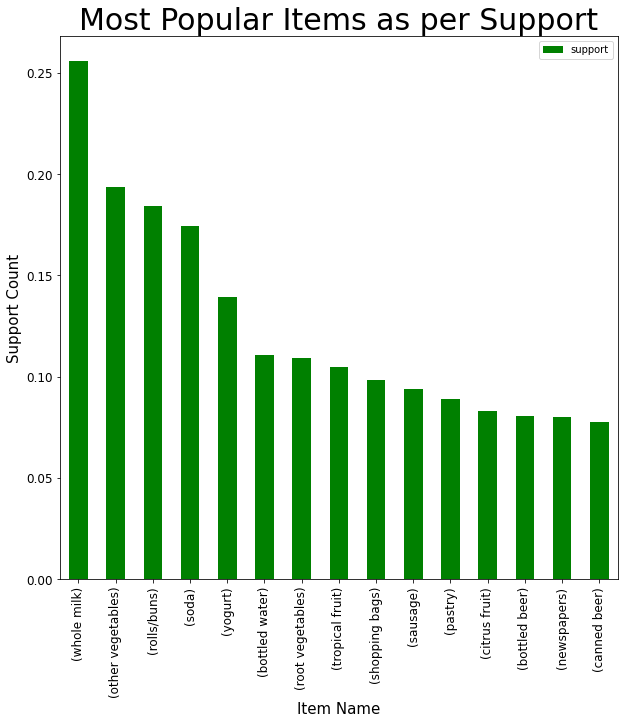

In [7]:
# for i in range (len(most_pop_items.itemsets)):
#     most_pop_items.itemsets.iloc[i]=str(list(most_pop_items.itemsets.iloc[i]))

# Here using a function instead of the above for loop for converting dataframe to list type

most_pop_items.values.tolist()

plt.rcParams['figure.figsize']=(10,10)
most_pop_items.plot.bar('itemsets','support',color='Green')
plt.xlabel('Item Name',fontsize=15)
plt.ylabel('Support Count',fontsize=15)
plt.title('Most Popular Items as per Support',fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

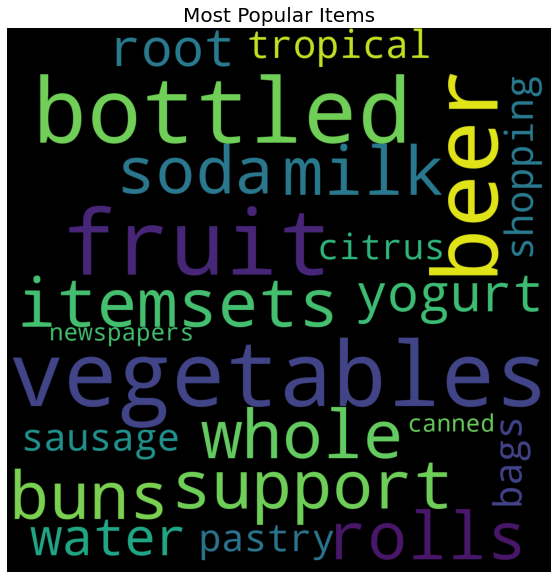

In [15]:
plt.rcParams['figure.figsize']=(10,10)
wordcloud=WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(str(most_pop_items))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize=20)
plt.show()

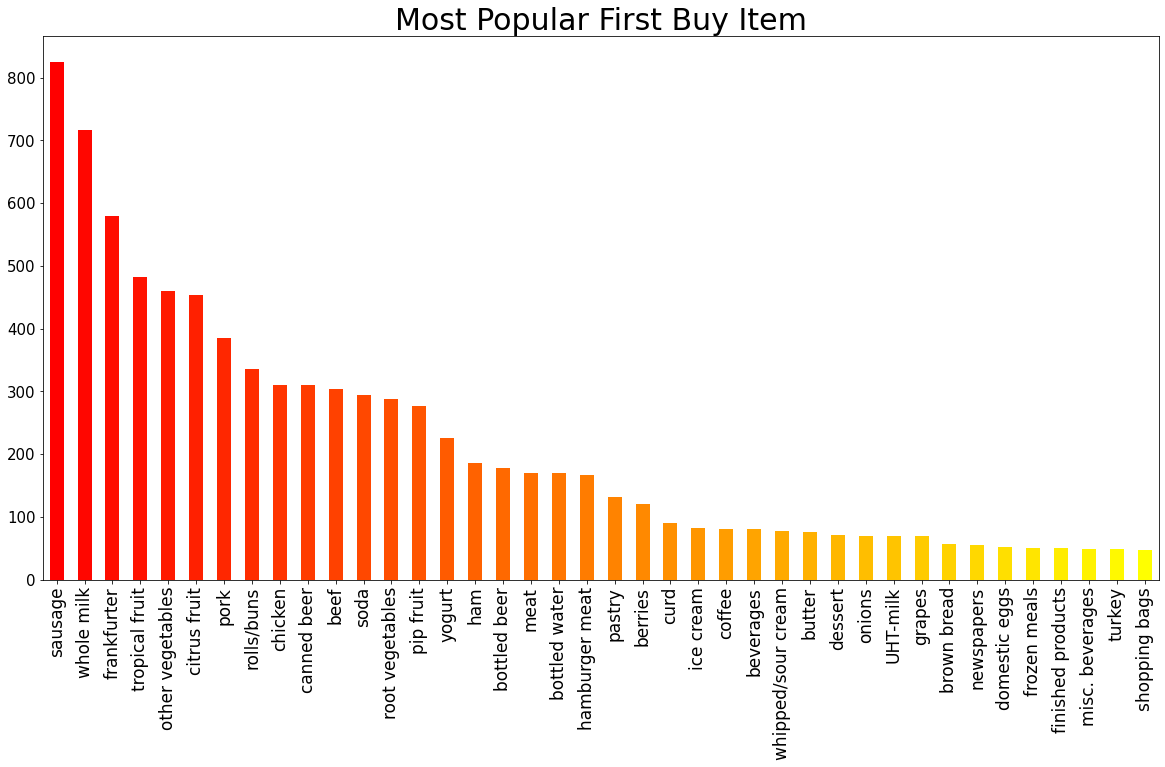

In [9]:
plt.rcParams['figure.figsize'] = (20, 10)
color = plt.cm.autumn(np.linspace(0, 1, 40))
dataset[0].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular First Buy Item', fontsize = 30)
plt.xticks(rotation = 90,fontsize=17 )
plt.yticks(fontsize=15)
plt.show()

In [10]:
association_confi=ar(frequent_items,metric='confidence',min_threshold=0.4)
a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
3670,"(pip fruit, whipped/sour cream, brown bread)",(other vegetables),0.001118,1.0,5.168156,0.000902,inf
7976,"(domestic eggs, whipped/sour cream, butter, ot...",(whole milk),0.001220,1.0,3.913649,0.000908,inf
8870,"(oil, tropical fruit, yogurt, root vegetables)",(whole milk),0.001118,1.0,3.913649,0.000833,inf
3861,"(domestic eggs, butter, soft cheese)",(whole milk),0.001017,1.0,3.913649,0.000757,inf
8712,"(pip fruit, whole milk, ham, tropical fruit)",(other vegetables),0.001118,1.0,5.168156,0.000902,inf
5053,"(domestic eggs, cream cheese, sugar)",(whole milk),0.001118,1.0,3.913649,0.000833,inf
9308,"(oil, tropical fruit, yogurt, other vegetables...",(whole milk),0.001017,1.0,3.913649,0.000757,inf
8303,"(citrus fruit, whipped/sour cream, tropical fr...",(other vegetables),0.001220,1.0,5.168156,0.000984,inf
8721,"(pip fruit, ham, tropical fruit, yogurt)",(other vegetables),0.001017,1.0,5.168156,0.000820,inf
3962,"(pip fruit, hygiene articles, butter)",(whole milk),0.001017,1.0,3.913649,0.000757,inf


In [11]:
association_supp=ar(frequent_items,metric='support',min_threshold=0.05)
a_supp_top=association_supp.sort_values('support',ascending=False)
a_supp_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.056024,0.401603,1.571735,0.020379,1.244132


In [12]:
association_lift=ar(frequent_items,metric='lift',min_threshold=3)
a_lift_top=association_lift.sort_values('lift',ascending=False)
a_lift_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
1531,(liquor),"(red/blush wine, bottled beer)",0.001932,0.174312,35.715787,0.001878,1.205200
1526,"(red/blush wine, bottled beer)",(liquor),0.001932,0.395833,35.715787,0.001878,1.636828
46974,"(yogurt, other vegetables, root vegetables)","(oil, tropical fruit, whole milk)",0.001017,0.078740,30.976378,0.000984,1.082711
46955,"(oil, tropical fruit, whole milk)","(yogurt, other vegetables, root vegetables)",0.001017,0.400000,30.976378,0.000984,1.645145
46966,"(whole milk, tropical fruit, other vegetables)","(oil, yogurt, root vegetables)",0.001017,0.059524,30.811404,0.000984,1.061237
46963,"(oil, yogurt, root vegetables)","(whole milk, tropical fruit, other vegetables)",0.001017,0.526316,30.811404,0.000984,2.075049
46706,"(domestic eggs, whole milk, yogurt, other vege...","(butter, tropical fruit)",0.001017,0.303030,30.411255,0.000983,1.420486
46727,"(butter, tropical fruit)","(domestic eggs, whole milk, yogurt, other vege...",0.001017,0.102041,30.411255,0.000983,1.109900
46708,"(whole milk, butter, tropical fruit)","(domestic eggs, yogurt, other vegetables)",0.001017,0.163934,28.285879,0.000981,1.189146
46725,"(domestic eggs, yogurt, other vegetables)","(whole milk, butter, tropical fruit)",0.001017,0.175439,28.285879,0.000981,1.205244


In [13]:
file = pd.ExcelWriter('Desktop\confidence.xlsx')
a_confi_top.drop(['antecedent support','consequent support','leverage','conviction'],axis=1).head(30).to_excel(file)
# assocn_rules_conf['consequents'].to_excel(file)

file.save()